# Tobigs 22기 3주차 정규세션 Ensemble 과제

# 과제1. High variance/bias

개념참조영상 : https://www.youtube.com/watch?v=EuBBz3bI-aA

## Q1. High variance의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ variance는 데이터의 흩어짐 정도를 나타내는 척도이다. high variance의 경우 과적합 문제를 일으킨다는 문제가 있다.

## Q2. High bias의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ bias는 학습된 모델의 예측값 평균과 실제 값간의 차이를 의미한다. 이런 bias가 높은 것을 high bias라고 하는데, high bias는 과소적합을 야기하는 문제가 있다.

## Q3. High variance 와 high bias를 다룰때 적합한 ensemble 방식과 그 이유를 적어주세요.

- High variance problem : 🐻‍❄️

High variance problem을 다룰 때는 bagging이 적합하다. bagging은 여러 모델을 각각 독립적으로 학습시키고, voting하여 최종 예측을 만들기 때문에 개별 모델들의 과적합된 부분들이 상쇄되어 전체적인 모델의 분산이 줄어들 수 있다.


- High bias problem : 🐻‍❄️

High bias problem을 다룰 때는 boosting이 적합하다. boosting은 이전 모델이 잘못 예측한 데이터 포인트에 가중치를 주는 방식(순차적)으로 모델을 학습시키므로, 모델이 점진적으로 개선되어 과소적합을 방지할 수 있다.

# 과제2. Ensemble 실습

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델 만들기!

### 칼럼 설명
```
[features]
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : 카드 종류 (Blue, Silver, Gold, Platinum)
 - Months_on_book : 은행과의 관계 기간 (개월 수)
 - Total_Relationship_Count : 고객이 보유한 전체 제품 수
 - Months_Inactive_12_mon : 최근 12개월 동안 비활성화된 개월 수
 - Contacts_Count_12_mon : 최근 12개월 동안의 연락 횟수
 - Credit_Limit : 신용 카드의 신용 한도
 - Total_Revolving_Bal : 신용 카드의 총 회전 잔액
 - Avg_Open_To_Buy : 구매 가능 신용 한도 (최근 12개월 평균)
 - Total_Amt_Chng_Q4_Q1 : 거래 금액 변화율 (4분기 대비 1분기)
 - Total_Trans_Amt :  총 거래 금액 (지난 12개월)
 - Total_Trans_Ct : 총 거래 횟수 (지난 12개월)
 - Total_Ct_Chng_Q4_Q1 : 거래 횟수 변화율 (4분기 대비 1분기)
 - Avg_Utilization_Ratio : 평균 카드 이용 비율

[target]
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1

```


### 데이터 로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# 🐻‍❄️데이터의 경로는 변경해주세요
df = pd.read_csv('/content/drive/MyDrive/tobigs/정규세션/3주차/BankChurners.csv')

# Feature 21 & 22의 경우 데이터 셋에서 삭제하는 것을 추천하는 문구 발견, 삭제
print(len(df.columns))
df.drop(df.columns[[21, 22]], axis = 1, inplace = True) # inplace = True 데이터 원본에서 처리 not copy
print(len(df.columns))

23
21


In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df.info()

# 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## EDA & Preprocessing

EDA를 통해 인사이트를 얻고 전처리를 진행해주세요.

In [ ]:
df.drop(columns=['CLIENTNUM'], axis = 1, inplace = True)

### 컬럼 분포 확인

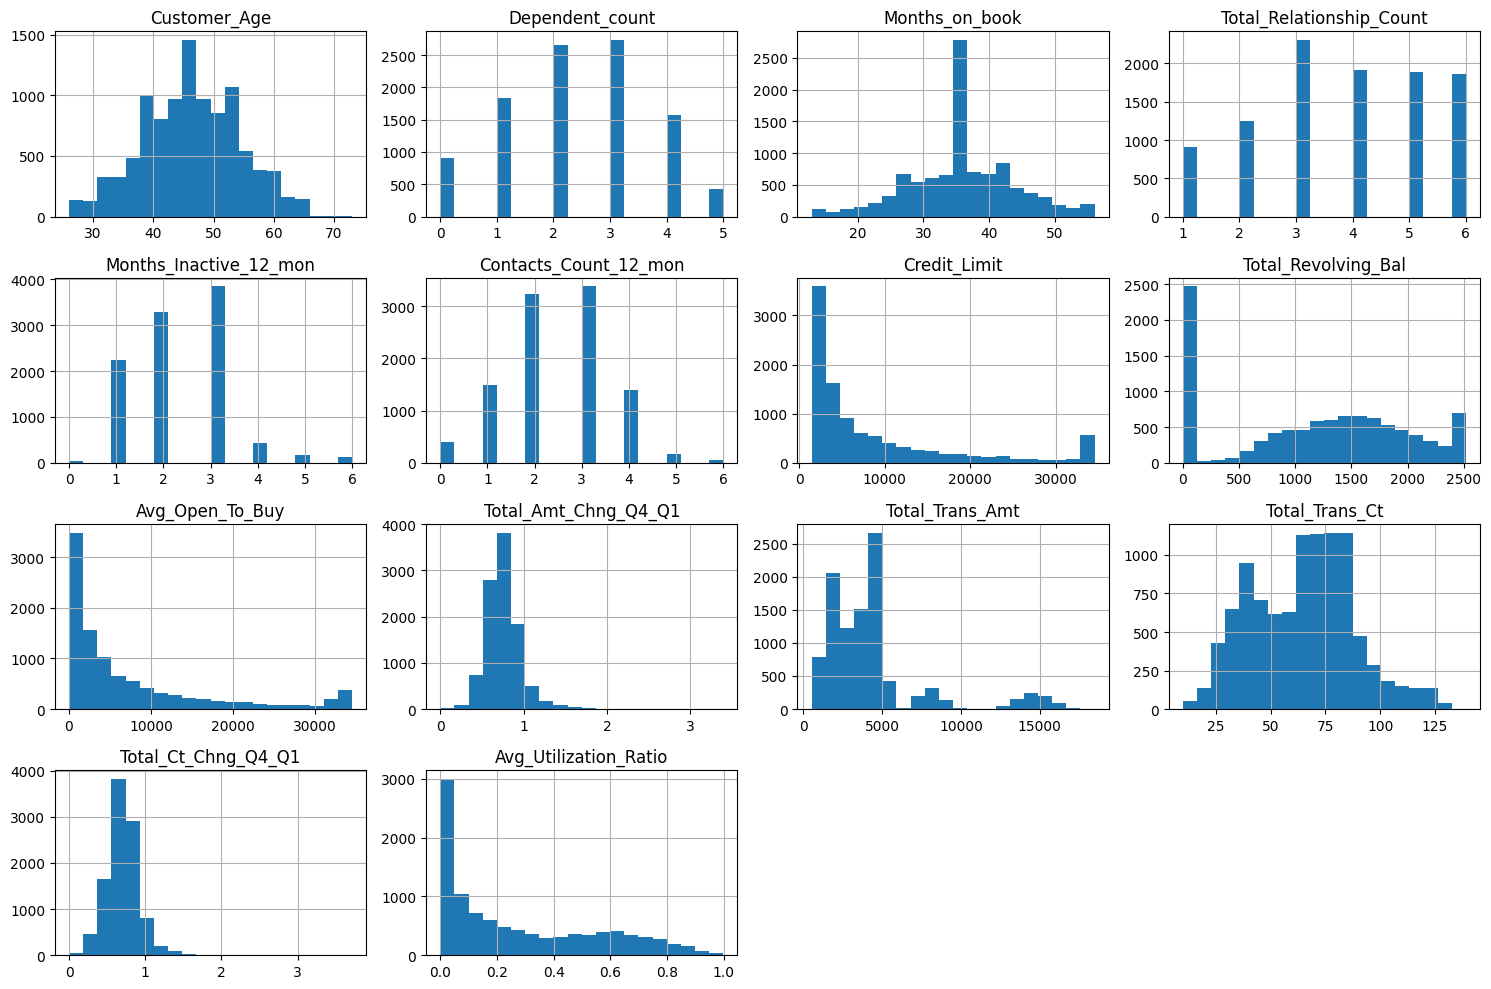

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(15, 10))

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from scipy import stats

# 로그 변환
df['Total_Trans_Amt'] = np.log1p(df['Total_Trans_Amt'])
df['Total_Revolving_Bal'] = np.log1p(df['Total_Revolving_Bal'])
df['Credit_Limit'] = np.log1p(df['Credit_Limit'])


# 제곱근 변환
df['Total_Amt_Chng_Q4_Q1'] = np.sqrt(df['Total_Amt_Chng_Q4_Q1'])
df['Total_Ct_Chng_Q4_Q1'] = np.sqrt(df['Total_Ct_Chng_Q4_Q1'])


# box-cox 변환
df['Avg_Utilization_Ratio'], _ = stats.boxcox(df['Avg_Utilization_Ratio']+ 1)
df['Avg_Open_To_Buy'], _ = stats.boxcox(df['Avg_Open_To_Buy']+ 1)


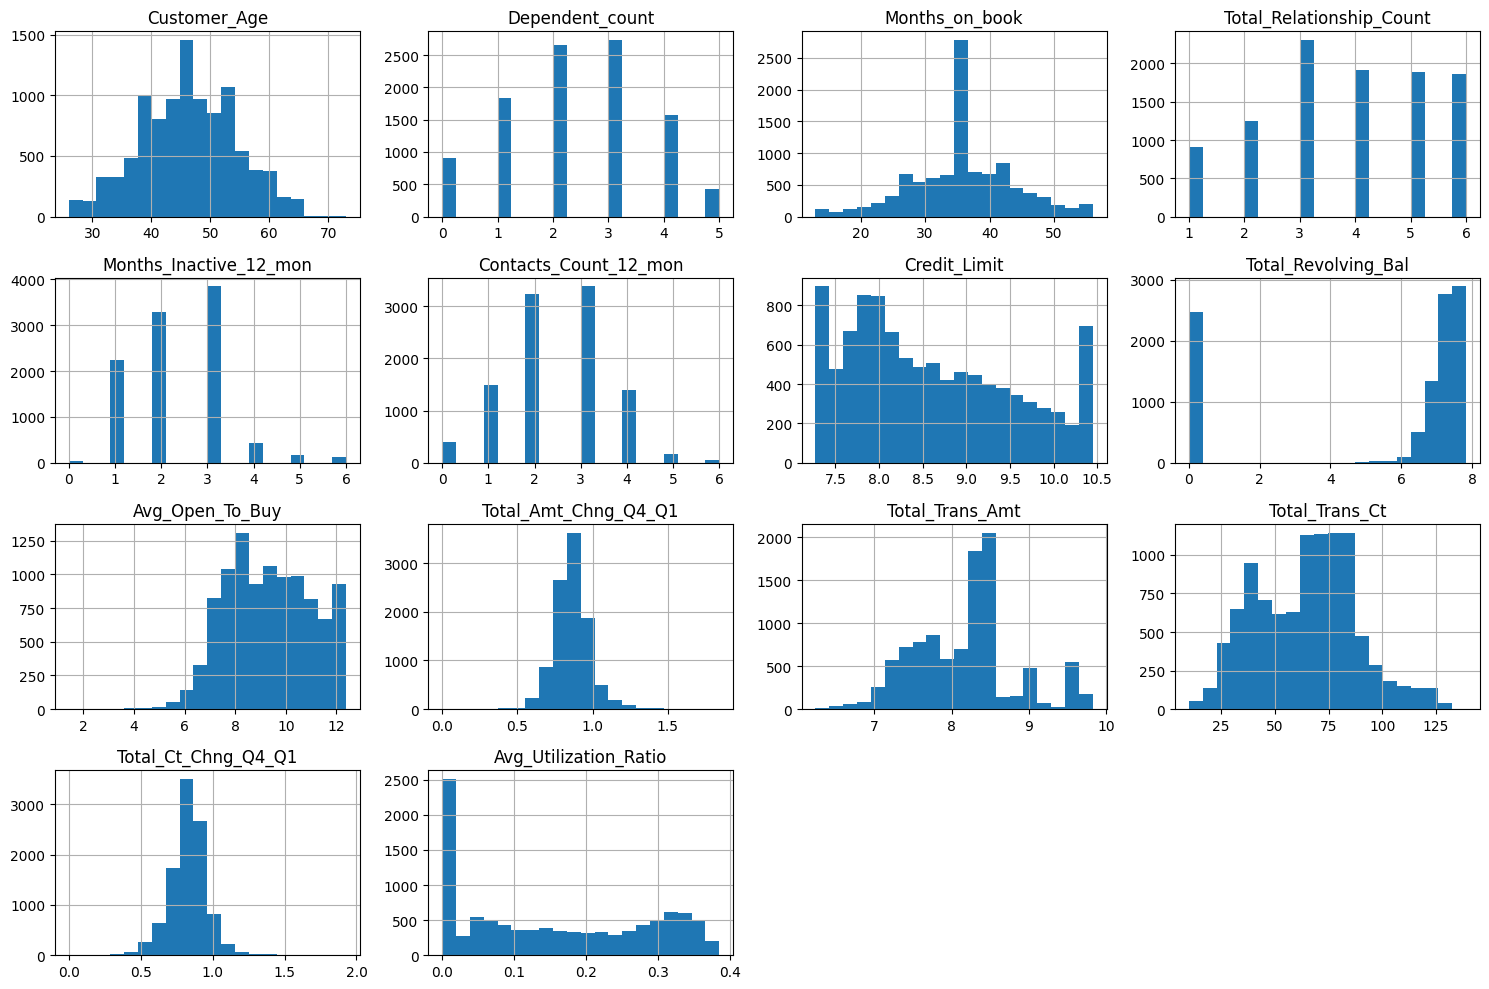

In [ ]:
df.hist(bins=20, figsize=(15, 10))

plt.tight_layout()
plt.show()

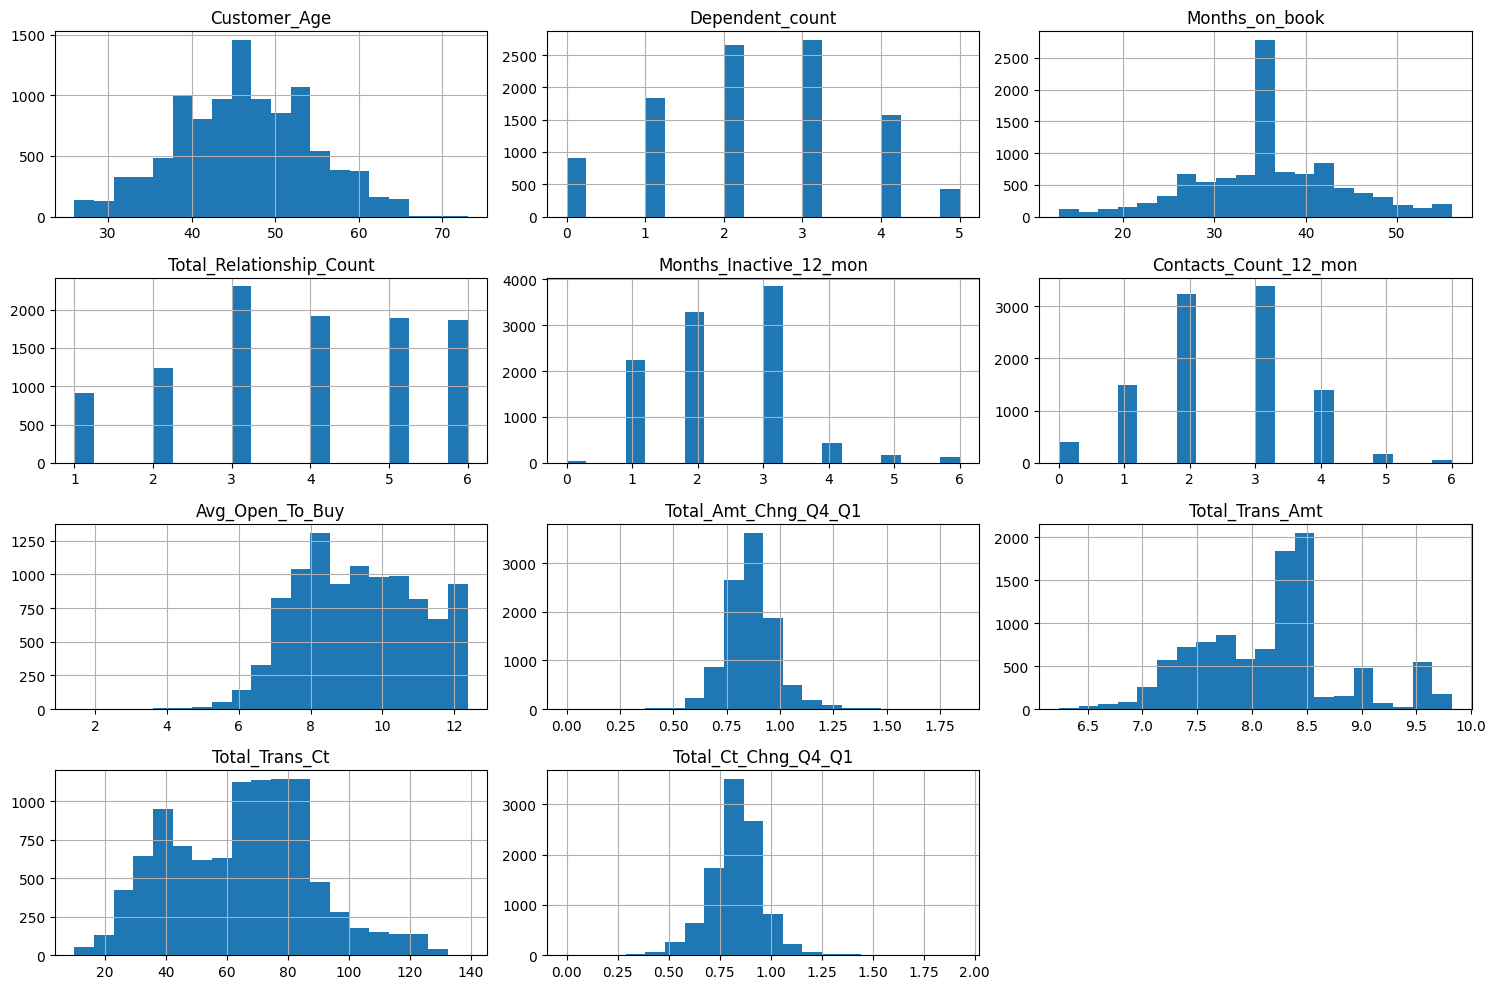

In [ ]:
df_skewdrop = df.drop(columns=['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio'])

df_skewdrop.hist(bins=20, figsize=(15, 10))

plt.tight_layout()
plt.show()

### 타겟 매핑 및 비율 확인

In [ ]:
# 타겟 0/1로 매핑
df_skewdrop['Attrition_Flag'] = df_skewdrop['Attrition_Flag'].map({
    'Existing Customer' : 0,
    'Attrited Customer' : 1
})

df_skewdrop.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,10.924765,1.155422,7.043160,42,1.274755
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,10.287650,1.241370,7.163947,33,1.927174
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,9.278253,1.610590,7.543273,20,1.527416
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,7.437941,1.185327,7.066467,20,1.527416
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,9.696499,1.474788,6.705639,28,1.581139


In [ ]:
# 타겟 비율 확인 -> 불균형 데이터셋
cnt = df_skewdrop['Attrition_Flag'].value_counts()
cnt

,count
Attrition_Flag,
0,8500
1,1627


### 범주형 변수 수치형으로 인코딩(라벨 인코딩)

In [ ]:
# 범주형 컬럼 확인

categorical_columns = df_skewdrop.select_dtypes(include=['object']).columns

for col in categorical_columns:
  print(f"Column: {col}")
  print(df[col].unique())
  print("\n")

Column: Gender
['M' 'F']


Column: Education_Level
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']


Column: Marital_Status
['Married' 'Single' 'Unknown' 'Divorced']


Column: Income_Category
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']


Column: Card_Category
['Blue' 'Gold' 'Silver' 'Platinum']




In [ ]:
# 라벨 인코딩(범주형 변수 리스트: categorical_columns)

from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()  # 각 컬럼에 대해 새로운 LabelEncoder 인스턴스 생성
    df_skewdrop[col] = le.fit_transform(df_skewdrop[col])
    label_encoders[col] = le  # LabelEncoder 저장

df_skewdrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Avg_Open_To_Buy           10127 non-null  float64
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 14  Total_

In [ ]:
df_skewdrop.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,0,45,1,3,3,1,2,0,39,5,1,3,10.924765,1.155422,7.043160,42,1.274755
1,0,49,0,5,2,2,4,0,44,6,1,2,10.287650,1.241370,7.163947,33,1.927174
2,0,51,1,3,2,1,3,0,36,4,1,0,9.278253,1.610590,7.543273,20,1.527416
3,0,40,0,4,3,3,4,0,34,3,4,1,7.437941,1.185327,7.066467,20,1.527416
4,0,40,1,3,5,1,2,0,21,5,1,0,9.696499,1.474788,6.705639,28,1.581139


### 데이터 분할

In [ ]:
X = df_skewdrop.drop(columns=['Attrition_Flag']).values
y = df_skewdrop['Attrition_Flag'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(6076, 16)
(2025, 16)
(2026, 16)


### 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

### 오버샘플링(SMOTE)

In [ ]:
# train 데이터만 오버샘플링

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(X_train_resampled.shape, y_train_resampled.shape)
print(X_valid_scaled.shape, y_valid.shape)
print(X_test_scaled.shape, y_test.shape)

(10200, 16) (10200,)
(2025, 16) (2025,)
(2026, 16) (2026,)


### 차원 축소

In [ ]:
from sklearn.decomposition import PCA

# 2. PCA 적용 (누적 분산이 95%가 되도록)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_resampled)
X_valid_pca = pca.transform(X_valid_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(X_train_pca.shape, y_train_resampled.shape)
print(X_valid_pca.shape, y_valid.shape)
print(X_test_pca.shape, y_test.shape)

(10200, 13) (10200,)
(2025, 13) (2025,)
(2026, 13) (2026,)


## Modeling

다음 4가지 모델의 성능을 비교해주세요.
- Decision Tree
- Random Forest
- Adaboost
- Gradientboosting
- 이외 다른 ensemble 모델을 사용하셔도 됩니다!


In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report

### DT

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6, 8],
    'criterion': ['gini'],
    'max_features': [None, 'sqrt']
}

grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train_pca, y_train_resampled)

print("Best Hyperparameters:", grid_search_dt.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
# train, valid 데이터 예측
y_train_pred_dt = grid_search_dt.predict(X_train_pca)
y_valid_pred_dt = grid_search_dt.predict(X_valid_pca)

# train, valid 예측 성능평가
print("Train Accuracy:", accuracy_score(y_train_resampled, y_train_pred_dt))
print("Valid Accuracy:", accuracy_score(y_valid, y_valid_pred_dt))

Train Accuracy: 0.9761764705882353
Valid Accuracy: 0.837037037037037


### RF

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [300],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [4, 6],
    'max_features': [None, 'sqrt'],
    'criterion': ['gini']
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_pca, y_train_resampled)

print("Best Hyperparameters:", grid_search_rf.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
# train, valid 데이터 예측
y_train_pred_rf = grid_search_rf.predict(X_train_pca)
y_valid_pred_rf = grid_search_rf.predict(X_valid_pca)

# train, valid 예측 성능평가
print("Train Accuracy:", accuracy_score(y_train_resampled, y_train_pred_rf))
print("Valid Accuracy:", accuracy_score(y_valid, y_valid_pred_rf))

Train Accuracy: 0.9842156862745098
Valid Accuracy: 0.882962962962963


### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search_ada = GridSearchCV(estimator=ada_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_ada.fit(X_train_pca, y_train_resampled)

print("Best Hyperparameters for AdaBoost:", grid_search_ada.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters for AdaBoost: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}


In [ ]:
# train, valid 데이터 예측
y_train_pred_ada = grid_search_ada.predict(X_train_pca)
y_valid_pred_ada = grid_search_ada.predict(X_valid_pca)

# train, valid 예측 성능평가
print("Train Accuracy:", accuracy_score(y_train_resampled, y_train_pred_ada))
print("Valid Accuracy:", accuracy_score(y_valid, y_valid_pred_ada))

Train Accuracy: 0.8580392156862745
Valid Accuracy: 0.8153086419753086


### gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4]
}

grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train_pca, y_train_resampled)

print("Best Hyperparameters for Gradient Boosting:", grid_search_gb.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
# train, valid 데이터 예측
y_train_pred_gb = grid_search_gb.predict(X_train_pca)
y_valid_pred_gb = grid_search_gb.predict(X_valid_pca)

# train, valid 예측 성능평가
print("Train Accuracy:", accuracy_score(y_train_resampled, y_train_pred_gb))
print("Valid Accuracy:", accuracy_score(y_valid, y_valid_pred_gb))

Train Accuracy: 1.0
Valid Accuracy: 0.8962962962962963


### XGB

In [ ]:
from xgboost import XGBClassifier

# XGBoost 모델 정의
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_pca, y_train_resampled)

# 최적 하이퍼파라미터 출력
print("Best Hyperparameters for XGBoost:", grid_search_xgb.best_params_)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:24:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters for XGBoost: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}


In [ ]:
# train, valid 데이터 예측
y_train_pred_xgb = grid_search_xgb.predict(X_train_pca)
y_valid_pred_xgb = grid_search_xgb.predict(X_valid_pca)

# train, valid 예측 성능평가
print("Train Accuracy:", accuracy_score(y_train_resampled, y_train_pred_xgb))
print("Valid Accuracy:", accuracy_score(y_valid, y_valid_pred_xgb))

Train Accuracy: 1.0
Valid Accuracy: 0.8972839506172839


## 테스트 데이터로 평가

In [ ]:
from sklearn.metrics import confusion_matrix

y_test_pred_xgb = grid_search_xgb.predict(X_test_pca)

print("Train Accuracy:", accuracy_score(y_test, y_test_pred_xgb))

cm = confusion_matrix(y_test, y_test_pred_xgb)
cm

Train Accuracy: 0.9091806515301086


array([[1601,   99],
       [  85,  241]])